In [1]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import pandas as pd
from skimage import metrics
from tqdm import tqdm

In [2]:
images = mat73.loadmat(r'Datasets/VisualMapTest/images_CCW1Mesh_visualmap.mat')
data = mat73.loadmat(r'Datasets/VisualMapTest/data_CCW1Mesh_visualmap.mat')

In [3]:
noisy_images = images['noisy_images']
all_x = data['all_x']
all_y = data['all_y']
all_z = data['all_z']

xgrid = np.arange(-79,81,2)#-79:2:79;
ygrid = np.arange(-119,-59,2)#-119:2:-57;
zgrid = np.arange(-58,70,2)#-58:2:68;

In [4]:
noisy_images.shape

(32, 80, 64, 10)

In [5]:
all_x.shape

(38468,)

In [6]:
locations = np.array([all_x, all_y, all_z])
locations.shape

(3, 38468)

In [7]:
noisy_image = noisy_images[:,:,:, 4]
noisy_image.shape

(32, 80, 64)

In [8]:
xgrid

array([-79, -77, -75, -73, -71, -69, -67, -65, -63, -61, -59, -57, -55,
       -53, -51, -49, -47, -45, -43, -41, -39, -37, -35, -33, -31, -29,
       -27, -25, -23, -21, -19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,
        -1,   1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,
        25,  27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,
        51,  53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,
        77,  79])

In [17]:
def LOCAscore(image, target_point):
    ind = np.unravel_index(np.argmax(noisy_image, axis=None), noisy_image.shape)
    image_point = [xgrid[ind[1]], ygrid[ind[0]], zgrid[ind[2]]]
    localisation_error = np.linalg.norm(image_point - target_point)
    return localisation_error


def LOCA(processed_images, target_points):
    LOCAimage = np.zeros(processed_images[...,0].shape)
    for i in (range(processed_images.shape[3])):
        score = LOCAscore(processed_images[...,i], target_points[:,i])
        LOCAimage[np.argwhere(ygrid==target_points[1,i])[0][0], np.argwhere(xgrid==target_points[0,i])[0][0], np.argwhere(zgrid==target_points[2,i])[0][0]] = score
    return LOCAimage

In [19]:
thing = LOCA(noisy_images, locations)

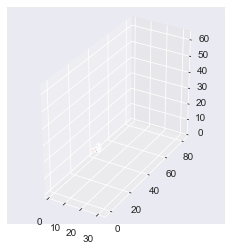

In [28]:
colors = np.empty(thing.shape, dtype='object')
colors[thing<np.quantile(thing[thing!=0], 0.25)] = 'purple'
colors[thing>np.quantile(thing[thing!=0], 0.25)] = 'blue'
colors[thing>np.quantile(thing[thing!=0], 0.5)] = 'green'
colors[thing>np.quantile(thing[thing!=0], 0.75)] = 'red'


ax = plt.figure().add_subplot(projection='3d')
ax.voxels(thing, facecolors=colors)
ax.set_aspect('equal')

plt.show()

In [27]:
np.quantile(thing, 0.25)

0.0